# Linear Regression Practice

## Import and Env. Setting
- pandas: Data conversion CSV to DataFrame
- sklearn
  - StnadardScaler: Data normalization
  - LinearRegression
- matplotlib
- seaboarn
- numpy
- google.colab
- os

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Implementation

In [ ]:
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

data = pd.read_csv(os.path.join(directory_path, csv_files[0]))
columns = ['averageTemperature', 'lowestTemperature', 'lowestTemperatureTime', 'highestTemperature', 'highestTemperatureTime', 'dailyRainfall', 'maximumWindSpeed', 'maximumWindSpeedTime', 'averageWindSpeed', 'maximumWindSpeedDirection']

prev_day_1 = data[columns].shift(1)
prev_day_2 = data[columns].shift(2)
prev_day_3 = data[columns].shift(3)


combined_data = pd.concat([data['baseDate'], prev_day_1.add_suffix('_prev1'), prev_day_2.add_suffix('_prev2'), prev_day_3.add_suffix('_prev3')], axis=1)
combined_data = combined_data.dropna()
combined_data = combined_data.reset_index(drop=True)

features = data.drop(columns=['baseDate', 'observatoryName'])

# Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

target = 'dailyRainfall'

X = scaled_data.drop(columns=[target])
y = scaled_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 1.3229933934660487
R-squared: 0.12210427901031351


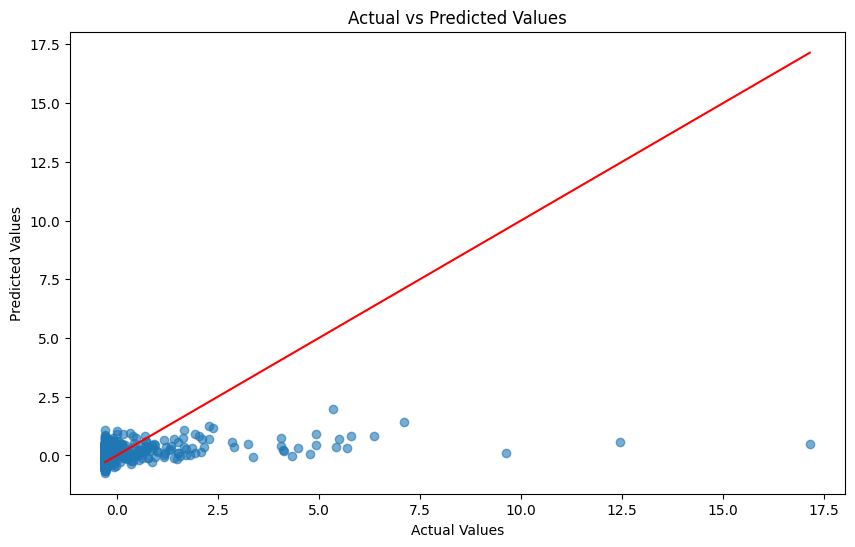

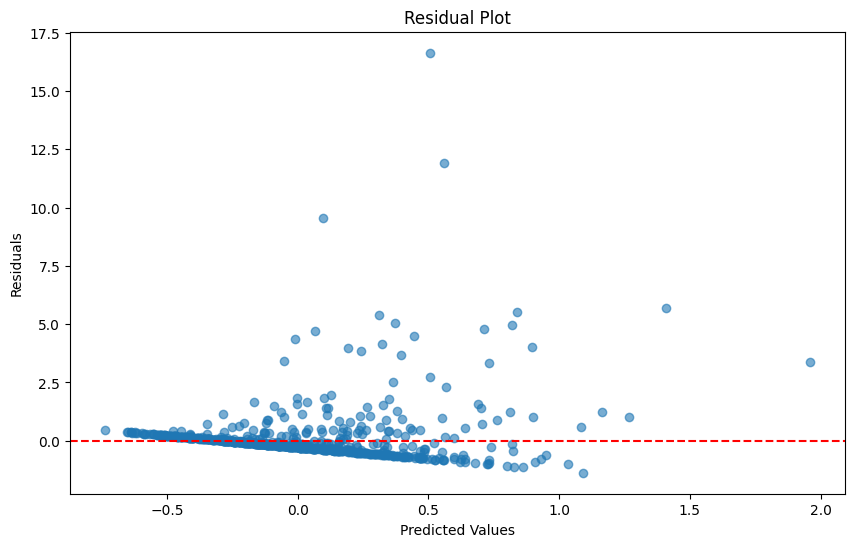

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')


residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Fine tuning
